## Проект: «Dota Analytics»

### Описание проекта:

В распоряжении датасет с пятью тысячами матчей Dota 2 с 2016 по 2020 год. Цель проекта: выявить определяющие успешность матча закономерности и характеристики, влияющие в большей степени на победу.

### Описание данных:
- match: номер матча
- patch: номер патча 
- date: дата матча
- duration: продолжительность матча
- player: номер игрока в игре (не уникальный)
- party_size: размер группы игрока (сколько людей вместе)
- party_id: номер группы внутри матча (не уникальный)
- team: команда (свет или тьма)
- hero: герой игрока
- level: уровень героя
- kills: убийства
- deaths: смерти
- assists: ассисты
- denies: количество убийст союзных крипов
- last_hits: количетсво убийств крипов
- hero_damage: урон по героям
- hero_healing: лечение по героям
- tower_damage: урон по строениям
- gold: остаток золота на конец матча
- gold_spent: золота потрачено
- total_gold: всего золота
- total_xp: всего опыта
- gpm: золота в минуту
- xpm: опыта в минуту
- kpm: убийств в минуту
- lhpm: добиваний крипов в минуту
- hdpm: дамаг по героям в минуту
- hhpm: лечение по героям в минуту
- win: победа
- lose: поражение

#### План работы:

1. Изучение датасета: знакомство с данными и выявление ошибок
2. Предобработка данных: очистка пропусков/дубликатов, приведение к корректным типам данных, очистка от выбросов
3. Исследовательский анализ данных: построение графиков, выявление взаимосвязей и соотношения характеристик, влияющих на победу
4. Проверка гипотез

### Этап 1. Изучение информации о датасете

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('/Users/carroll/own_datasets/concat.csv')

In [3]:
df.head(10)

,match,patch,date,duration,player,party_size,party_id,team,hero,level,...,total_gold,total_xp,gpm,xpm,kpm,lhpm,hdpm,hhpm,win,lose
0,2317384568,16,4/24/2016,45.500000,NaN,NaN,NaN,radi,8,25,...,28892,32760.0,635,720,0.175824,5.648352,229.516484,0.000000,1,0
1,2186463311,16,2/29/2016,20.316667,NaN,NaN,NaN,radi,63,8,...,4185,3311.0,206,163,0.000000,0.442986,120.295324,0.000000,0,1
2,2317519290,16,4/24/2016,43.966667,116126841.0,NaN,NaN,radi,36,17,...,11914,15564.0,271,354,0.159212,1.296437,231.993935,87.793783,0,1
3,2317715122,16,4/24/2016,43.550000,216264242.0,NaN,NaN,radi,10,21,...,22254,24170.0,511,555,0.275545,3.490241,385.350172,0.000000,1,0
4,2317811491,16,4/24/2016,33.016667,116798663.0,NaN,NaN,radi,36,18,...,14659,17135.0,444,519,0.060575,4.270570,146.895507,11.660777,1,0
5,2322214354,17,4/26/2016,42.366667,307329092.0,NaN,NaN,radi,14,18,...,14616,17836.0,345,421,0.212431,2.077105,290.346184,0.000000,0,1
6,2324104806,17,4/27/2016,32.433333,266681816.0,NaN,NaN,radi,43,13,...,10443,9859.0,322,304,0.184995,1.788284,294.789311,3.268243,0,1
7,2322112219,17,4/26/2016,42.216667,NaN,NaN,NaN,radi,28,19,...,14691,19841.0,348,470,0.189499,0.497434,257.836557,0.000000,1,0
8,2324202763,17,4/27/2016,34.466667,NaN,NaN,NaN,radi,14,17,...,15234,16716.0,442,485,0.435203,1.276596,401.605416,0.000000,1,0
9,2324530119,17,4/28/2016,64.716667,214817454.0,NaN,NaN,radi,7,23,...,23168,27763.0,358,429,0.092712,2.194180,195.915529,0.000000,0,1


Перед нами датафрейм с записями статистик о матчах в dota 2. На один уникальный матч приходится по 10 записей - по одной на каждого игрока из двух команд. Каждая запись содержит суммарные данные по игроку за весь матч. 

Матчи перемешаны, также перемешаны статусы победы/поражения, столбцы win и lose дублируют друг друга. Записи в duration тяжело читать из-за вещественного типа. Исправим это:

In [4]:
df.sort_values(by=['match','win'], inplace=True)
df = df.reset_index(drop=True)
df = df.rename(columns={"win": "win_status"})
df = df.drop(columns='lose')
df['duration'] = df['duration'].round().astype(int)

Изучим информацио о датафрейме. Посмотрим количество пропусков и поищем дубликаты:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54100 entries, 0 to 54099
Data columns (total 29 columns):
match           54100 non-null int64
patch           54100 non-null int64
date            54100 non-null object
duration        54100 non-null int64
player          51080 non-null float64
party_size      31550 non-null float64
party_id        33950 non-null float64
team            54100 non-null object
hero            54100 non-null int64
level           54100 non-null int64
kills           54100 non-null int64
deaths          54100 non-null int64
assists         54100 non-null int64
denies          54100 non-null int64
last_hits       54100 non-null int64
hero_damage     54090 non-null float64
hero_healing    54090 non-null float64
tower_damage    54090 non-null float64
gold            54090 non-null float64
gold_spent      54090 non-null float64
total_gold      54100 non-null int64
total_xp        54094 non-null float64
gpm             54100 non-null int64
xpm             5410

In [6]:
def find_null():
    print('Количество пропусков в датафрейме:')
    print(df.isna().sum()[df.isna().sum() > 0])

In [7]:
find_null()

Количество пропусков в датафрейме:
player           3020
party_size      22550
party_id        20150
hero_damage        10
hero_healing       10
tower_damage       10
gold               10
gold_spent         10
total_xp            6
dtype: int64


Пропуски в player, party_size и party_id попали в таблицу из-за особенностей работы парсера реплеев, заполнить их нет возможности, поэтому оставим их как есть. Сосредоточимся на пропусках в оставшихся столбцах:

In [8]:
null_matches = (
    df[df['hero_damage'].isna() & df['hero_healing'].isna() 
                   & df['gold'].isna() & df['gold_spent'].isna()]
)
print('Список уникальных матчей:', null_matches['match'].unique())
null_matches

Список уникальных матчей: [4249255649]


,match,patch,date,duration,player,party_size,party_id,team,hero,level,...,gold_spent,total_gold,total_xp,gpm,xpm,kpm,lhpm,hdpm,hhpm,win_status
44050,4249255649,39,12/1/2018,42,NaN,NaN,NaN,radi,44,23,...,NaN,14948,23399.0,352,551,0.070644,3.861852,0.0,0.0,0
44051,4249255649,39,12/1/2018,42,1.0,NaN,NaN,radi,10,24,...,NaN,15967,24418.0,376,575,0.235479,3.202512,0.0,0.0,0
44052,4249255649,39,12/1/2018,42,2.0,NaN,NaN,radi,97,21,...,NaN,12230,19619.0,288,462,0.000000,3.178964,0.0,0.0,0
44053,4249255649,39,12/1/2018,42,3.0,NaN,NaN,radi,59,24,...,NaN,15542,24758.0,366,583,0.235479,2.519623,0.0,0.0,0
44054,4249255649,39,12/1/2018,42,4.0,NaN,NaN,radi,26,20,...,NaN,11720,18260.0,276,430,0.094192,2.142857,0.0,0.0,0
44055,4249255649,39,12/1/2018,42,128.0,NaN,NaN,dire,29,22,...,NaN,17114,21530.0,403,507,0.047096,3.461538,0.0,0.0,1
44056,4249255649,39,12/1/2018,42,129.0,NaN,NaN,dire,84,25,...,NaN,22252,28028.0,524,660,0.447410,2.284144,0.0,0.0,1
44057,4249255649,39,12/1/2018,42,130.0,NaN,NaN,dire,86,25,...,NaN,21870,27475.0,515,647,0.141287,5.675039,0.0,0.0,1
44058,4249255649,39,12/1/2018,42,131.0,NaN,NaN,dire,14,25,...,NaN,19152,29344.0,451,691,0.353218,1.860283,0.0,0.0,1
44059,4249255649,39,12/1/2018,42,132.0,NaN,NaN,dire,102,25,...,NaN,23569,32741.0,555,771,0.282575,4.332810,0.0,0.0,1


Записи из одного матча, которые по какой-то причине не попали в в датафрейм. С учетом того, пропущены значения в gold и gold_spent, но есть сумма в total_gold, скорее всего данные не попали из-за сбоя. Так как это значения всего одного матча, удалим его из таблицы на этапе предобработки данных, а сами столбцы приведем к целочисленному типу.

Изучим пропуски в total_xp:

In [9]:
print('Список уникальных матчей:', df[df['total_xp'].isna()]['match'].unique())
(df[df['total_xp'].isna()]
 [['match', 'duration', 'hero_damage', 
   'gold_spent', 'kills', 'deaths', 'assists', 
   'total_xp', 'last_hits', 'denies', 'level', 'team']].round()
)

Список уникальных матчей: [2331247460 3147633140 3192880262 3749943696 4134738454]


,match,duration,hero_damage,gold_spent,kills,deaths,assists,total_xp,last_hits,denies,level,team
285,2331247460,53,0.0,0.0,0,0,0,NaN,0,0,1,radi
13253,3147633140,45,0.0,575.0,0,0,0,NaN,0,0,1,dire
13254,3147633140,45,134.0,1225.0,0,1,0,NaN,0,0,1,dire
14680,3192880262,62,0.0,0.0,0,0,0,NaN,0,0,1,radi
35085,3749943696,6,0.0,0.0,0,0,0,NaN,0,0,1,dire
42582,4134738454,42,60.0,580.0,0,2,0,NaN,0,0,1,dire


В таблице видно, что это герои первого уровня, которые могли принимать минимальное участие в игре, вероятно не получили опыт. На этапе преодобработки данных примем решение об удалении этих значений из таблицы.

Исследуем датафрейм на наличие дубликатов:

In [10]:
df.duplicated().sum()

0

Изучим данные в столбцах, затем построим гистограммы:

In [11]:
int_cols = []
for i in df.columns:
    if df[i].dtype == int:
        if i == 'match' or i == 'win_status' or i == 'patch' or i =='hero':
            continue
        int_cols.append(i)
        
df[int_cols].describe().astype(int)

,duration,level,kills,deaths,assists,denies,last_hits,total_gold,gpm,xpm
count,54100,54100,54100,54100,54100,54100,54100,54100,54100,54100
mean,43,21,8,8,13,5,144,18125,416,525
std,11,4,6,4,7,6,100,7706,124,152
min,4,1,0,0,0,0,0,497,90,0
25%,35,18,4,6,8,1,70,12663,327,421
50%,42,22,7,9,13,3,124,17114,404,527
75%,50,25,12,12,18,8,195,22387,491,631
max,104,30,54,45,67,75,1354,80349,1278,1773


In [12]:
float_cols = []
for i in df.columns:
    if df[i].dtype == float:
        if i == 'party_id' or i == 'player':
            continue
        float_cols.append(i)
df[float_cols].describe().round(2)

,party_size,hero_damage,hero_healing,tower_damage,gold,gold_spent,total_xp,kpm,lhpm,hdpm,hhpm
count,31550.00,54090.00,54090.00,54090.00,54090.00,54090.00,54094.00,54100.00,54100.00,54100.00,54100.00
mean,1.80,22226.52,591.98,1981.09,1792.59,14942.66,22958.84,0.20,3.28,504.01,13.84
std,1.23,14405.61,1762.71,2706.42,1673.20,6535.60,9317.98,0.14,1.96,267.22,40.56
min,1.00,0.00,0.00,0.00,0.00,0.00,96.00,0.00,0.00,0.00,0.00
25%,1.00,12063.00,0.00,175.00,576.00,10305.00,15842.25,0.10,1.79,311.78,0.00
50%,1.00,18880.00,0.00,884.00,1293.00,14150.00,22840.00,0.17,2.99,454.50,0.00
75%,2.00,28800.25,146.75,2729.75,2549.00,18670.00,29332.75,0.27,4.41,645.11,3.53
max,5.00,196676.00,34000.00,25882.00,28334.00,65500.00,74764.00,1.84,17.60,3102.17,681.35


В части столбцов максимальное значение уходит далеко вперед от значения 3го квартиля, вместе с высоким стандартным отклонением это может говорить о большом разбросе в данных и статистических выбросах.

Выборочно, по столбцам 'hero_damage', 'total_gold' и 'last_hits'построим гистограммы, чтобы посмотреть, как распределелись значения:

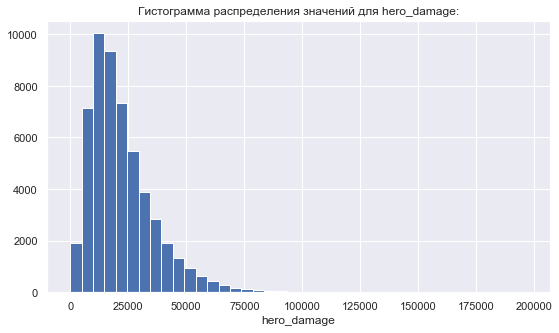

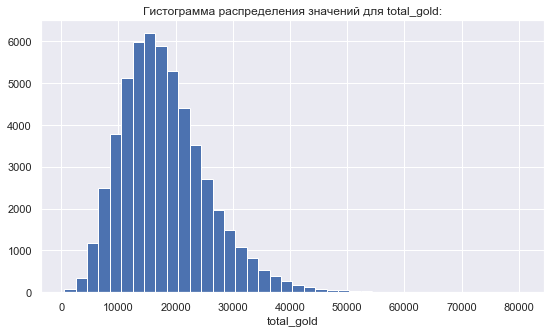

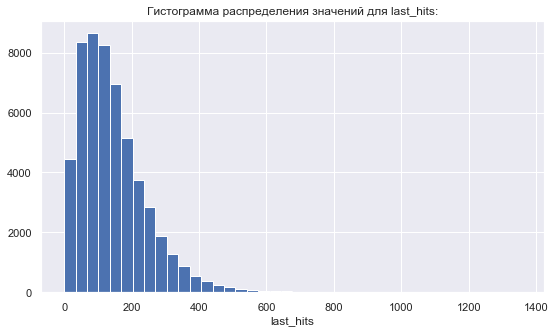

In [13]:
for i in ['hero_damage', 'total_gold', 'last_hits']:
    df[i].hist(bins=40, figsize=(9,5))
    plt.title(f'Гистограмма распределения значений для {i}:')
    plt.xlabel(i)
    plt.show()

Гистограммы имеют форму пуассоновского распределения, при этом они сильно перекошены из-за наличия аномально высоких значений в выборке. Подробнее остановимся на этом на этапе обработки данных.

Выборочно для столбцов 'level', 'deaths' и 'denies' построим графики плотности распределения вероятностей:

In [14]:
def density_plot(column):
    cd_dict = dict(df[column].value_counts(normalize=True))
    plt.subplots(figsize=(9, 5))
    plt.bar(cd_dict.keys(), cd_dict.values(), color='g')   
    plt.xlabel(column)
    plt.title(f'График плотности распределения вероятностей для {column}:')
    plt.show()

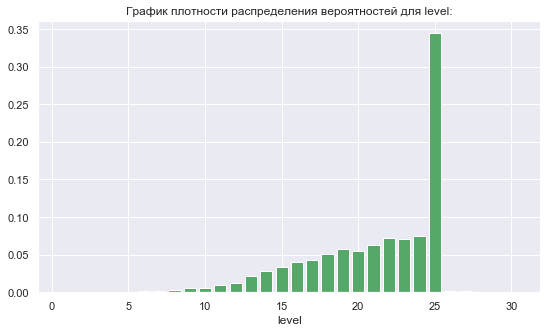

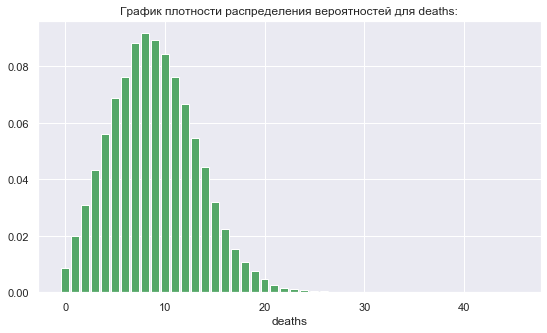

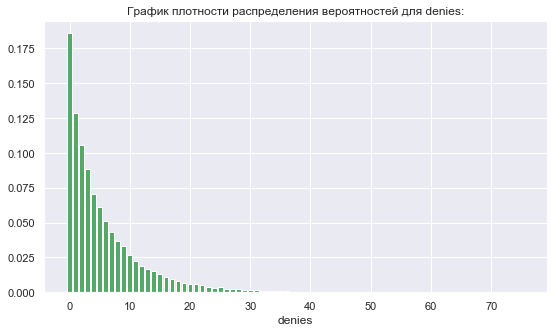

In [15]:
for i in ['level', 'deaths', 'denies']:
    density_plot(i)

Также как и на гистограммах выше, все графики имеют заметный перекос вправо в сторону аномальных значений. По высоте столбцов можно увидеть вероятность встречаемости конкретных значений. Например примерно 34% всех игроков в датасете имели 25 уровень на момент окончания матча; 9% игроков имеют по 8 смертей, 18% - не делают deny "крипов".

Изучим данные в столбце 'party_size':

In [16]:
df['party_size'].value_counts()

1.0    18970
2.0     5634
3.0     3861
5.0     2785
4.0      300
Name: party_size, dtype: int64

Записей с составом комнады в 4 союзника меньше всего, посмотрим матчи с таким составом в датасете:

In [17]:
df[df['match'].isin(df[df['party_size'] == 4]['match'])].head(10)

,match,patch,date,duration,player,party_size,party_id,team,hero,level,...,gold_spent,total_gold,total_xp,gpm,xpm,kpm,lhpm,hdpm,hhpm,win_status
20950,3475617857,25,10/1/2017,68,128.0,3.0,2.0,dire,105,25,...,22625.0,29299,31600.0,433,467,0.118227,3.783251,782.261084,0.000000,0
20951,3475617857,25,10/1/2017,68,129.0,3.0,2.0,dire,14,25,...,19645.0,25984,35795.0,384,529,0.162562,2.231527,546.266010,0.000000,0
20952,3475617857,25,10/1/2017,68,130.0,3.0,2.0,dire,85,25,...,19315.0,21179,30788.0,313,455,0.088670,1.507389,317.807882,106.182266,0
20953,3475617857,25,10/1/2017,68,131.0,2.0,3.0,dire,41,25,...,33400.0,40803,40938.0,603,605,0.339901,6.073892,814.788177,0.000000,0
20954,3475617857,25,10/1/2017,68,132.0,2.0,3.0,dire,51,25,...,25375.0,29435,40735.0,435,602,0.236453,3.990148,827.364532,0.000000,0
20955,3475617857,25,10/1/2017,68,225982637.0,1.0,0.0,radi,81,25,...,32355.0,39652,47705.0,586,705,0.428571,6.428571,1142.334975,0.000000,1
20956,3475617857,25,10/1/2017,68,1.0,4.0,1.0,radi,23,25,...,16925.0,25578,29232.0,378,432,0.014778,3.458128,316.714286,0.000000,1
20957,3475617857,25,10/1/2017,68,2.0,4.0,1.0,radi,21,25,...,29295.0,32547,41006.0,481,606,0.118227,5.039409,446.660099,0.000000,1
20958,3475617857,25,10/1/2017,68,3.0,4.0,1.0,radi,34,25,...,22155.0,31735,41682.0,469,616,0.236453,4.862069,1150.980296,0.000000,1
20959,3475617857,25,10/1/2017,68,4.0,4.0,1.0,radi,114,25,...,25210.0,29096,38637.0,430,571,0.073892,4.463054,450.088670,0.000000,1


Интересно то, что составы команд перемешаны, то есть друг друг против друга могут играть составы 3/2 и 4/1. Это означает что составы двух команд не зеркальные, а так же то, что по параметру party_size нельзя будет отфильтровать игры без союзников, поскольку в играх с союзниками так же присуствуют значения party_size "1". Попробуем решить это проблему на следующих этапах.

### Вывод

На этом этапе изучили данные датасета: всего 54100 записей, то есть 5410 уникальных матчей, 29 столбцов с полным набором игровых статистик на момент окончания матча. В данных отсуствуют дубликаты, но имеются пропуски в столбцах player, party_size, party_id, hero_damage, hero_healing, tower_damage, gold, gold_spent, total_xp. В столбцах с наименьших количеством их можно устранить очисткой, в столбцах с наибольшим - пропуски заполнить нечем, поэтому оставим их в таблице. Сами данные имеют большой разброс значений.

### Этап 2. Преодобработка данных

Удалим найденные пропуски в столбцах hero_damage, hero_healing, tower_damage, gold, gold_spent:

In [18]:
df = df[df['match'] != null_matches['match'].unique()[0]]

In [19]:
find_null()

Количество пропусков в датафрейме:
player         3019
party_size    22540
party_id      20140
total_xp          6
dtype: int64


In [20]:
def processing():
    return len(df)
def conclusion():
    print(f'Количество значений в датафрейме после обработки: {processing()}')
conclusion()

Количество значений в датафрейме после обработки: 54090


Приведем эти столбцы к целочисленному типу:

In [21]:
null_cols=['hero_damage','hero_healing', 'tower_damage', 'gold', 'gold_spent']
for i in null_cols:
    df[i] = df[i].astype(int)
df[null_cols].dtypes

hero_damage     int64
hero_healing    int64
tower_damage    int64
gold            int64
gold_spent      int64
dtype: object

Приведем столбец 'date' к типу datetime и создадим столбец с годами:

In [22]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

Попробуем обработать столбец 'party_size', чтобы появилась возможность отличать singleplayer игры от игр с союзниками

In [23]:
#%%time
#Код выполняется 34.5 секунды
#for i in df['match'].unique():
#    if df[df['match'] == i]['party_size'].sum() > 10:
#        df.loc[df['match'] == i, 'party_status'] = 'multiplayer'
#    else:
#        df.loc[df['match'] == i, 'party_status'] = 'singleplayer'
#Код выполняется 45.5 секунд
#def fixp(row):
#    return df[df['match'] == row]['party_size'].max()
#df['party_test'] = df['match'].apply(fixp)

Оба решения обрабатывают таблицу слишком медленно. Также, результаты проверок показали, что в датафрейме присуствует часть матчей, в которых играют singleplayer против multiplayer (эти матчи будут искажать выводы при исследовании разных составов, поэтому их необходимо удалить), оба способа обработки столбца не позволяют легко идентифицировать эти матчи. На текущий момент оставим этот столбец без изменений и вернемся к нему на этапе исследовательского анализа данных.

Исследуем выбросы в датафрейме, для этого построим диаграммы размаха, рассчитаем аномальные значения и их количество:

In [24]:
def whiskerright(df, column_type):
    q3=df[column_type].quantile(0.75)
    q1=df[column_type].quantile(0.25)
    whisker = q3 + 1.5*(q3-q1)
    return whisker

def whiskerleft(df, column_type):
    q3=df[column_type].quantile(0.75)
    q1=df[column_type].quantile(0.25)
    whisker = q1 - 1.5*(q3-q1)
    return whisker

def outburst(df, column_type):
    q3outburst = len(df[df[column_type] > whiskerright(df, column_type)])
    q1outburst = len(df[df[column_type] < whiskerleft(df, column_type)])
    print('Крайнее возможное значение "правого уса" по столбцу {}: {:.3f}'.format(column_type, whiskerright(df, column_type)))
    print('Крайнее возможное значение "левого уса" по столбцу {}: {:.3f}'.format(column_type, whiskerleft(df, column_type)))
    print('Количество выбросов, превышающих размах "правого уса" по столбцу {}: {}'.format(column_type, q3outburst))
    print('Количество выбросов, превышающих размах "левого уса" по столбцу {}: {}'.format(column_type, q1outburst))
    print('Доля выбросов от общего числа значений по столбцу {}: {:.2%}'.format(column_type, ((q3outburst + q1outburst) / len(df[column_type]))))    
    
def bplot(df, value):
    plt.subplots(figsize=(9, 5))
    sns.boxplot(data=df[value], orient='h')
    plt.show()
    outburst(df, value)

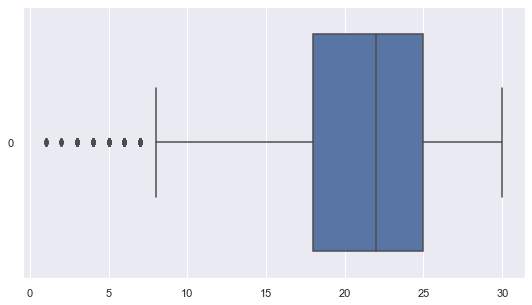

Крайнее возможное значение "правого уса" по столбцу level: 35.500
Крайнее возможное значение "левого уса" по столбцу level: 7.500
Количество выбросов, превышающих размах "правого уса" по столбцу level: 0
Количество выбросов, превышающих размах "левого уса" по столбцу level: 302
Доля выбросов от общего числа значений по столбцу level: 0.56%


In [25]:
bplot(df, 'level')

С учетом того, что нам придется вычищать из таблицы матчи, то количество значений, которое будет удалено из таблицы будет больше 302 или 0.56% примерно в 10 раз. При очистке от выбросов придется удалять не 1 запись, содержащую аномальное значение, а удалять уникальную запись матча, в которой содержится 10 строк записей со статистикой по каждому игроку. Таким образом посчитаем процент выбросов от всех записей датафрейма:

In [26]:
def real_ratio(df, column):
    ratio_low = (len(df[df[column] <= whiskerleft(df, column)]['match'].unique()) * 10) / len(df)
    ratio_high = (len(df[df[column] >= whiskerright(df, column)]['match'].unique()) * 10) / len(df)        
    q3outburst = len(df[df[column] > whiskerright(df, column)])
    q1outburst = len(df[df[column] < whiskerleft(df, column)])
    if q3outburst > 0 and q1outburst == 0:
        print('Процентное соотношение выбросов от всего датафрейма: {:.2%}'.format(ratio_high))
    elif q1outburst > 0 and q3outburst == 0:
        print('Процентное соотношение выбросов от всего датафрейма: {:.2%}'.format(ratio_low))
    else: 
        print(f'В столбце {column} выбросы отсутствуют')
    if q3outburst > 0 and q1outburst > 0:  
        print('Процентное соотношение выбросов от всего датафрейма: {:.2%}'.format(ratio_low + ratio_high))
real_ratio(df, 'level')

Процентное соотношение выбросов от всего датафрейма: 3.55%


In [27]:
before_clean = len(df)

Таким образом удалим сразу и короткие матчи:

In [28]:
low_level = df[df['level'] <= whiskerleft(df, 'level')]['match'].unique()
df = df[~df['match'].isin(low_level)]

In [29]:
conclusion()

Количество значений в датафрейме после обработки: 52170


Исследуем выбросы в столбце 'hero_damage':

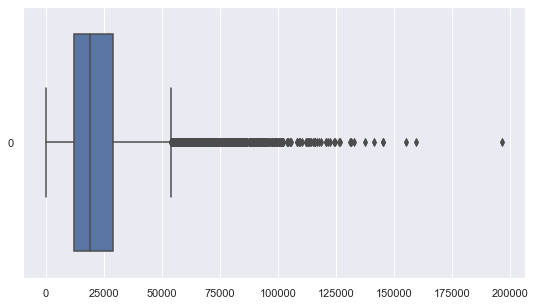

Крайнее возможное значение "правого уса" по столбцу hero_damage: 54176.500
Крайнее возможное значение "левого уса" по столбцу hero_damage: -12731.500
Количество выбросов, превышающих размах "правого уса" по столбцу hero_damage: 1901
Количество выбросов, превышающих размах "левого уса" по столбцу hero_damage: 0
Доля выбросов от общего числа значений по столбцу hero_damage: 3.64%


In [30]:
bplot(df, 'hero_damage')

Теперь по той же схеме рассчитаем реальный процент записей, которые содержат в себе аномальные значения:

In [31]:
real_ratio(df, 'hero_damage')

Процентное соотношение выбросов от всего датафрейма: 21.24%


22% всех матчей или записей мы не можем позволить себе удалить, поэтому будем срезать только самую верхушку записей в пределах 1% от датасета, чтобы уменьшить число аномальных значений и при этом не удалить более 10% от всех данных:

In [32]:
def matches_list(df, column):
    return df[df[column] >= int(df[column].quantile(0.999))]['match'].unique()
def outburst_info(df, column):
    share = (len(matches_list(df, column) * 10) / len(df))
    q = len(matches_list(df, column))
    print(f'Пороговое значение: {int(df[column].quantile(0.999)) - 1}')
    print(f'Количество матчей: {q}')
    print('Доля значений от общего числа записей в датафрейме: {:.2%}'.format(share * 10))
def cleaning(df, column):
    return df[~df['match'].isin(matches_list(df, column))]

In [33]:
outburst_info(df, 'hero_damage')

Пороговое значение: 101442
Количество матчей: 50
Доля значений от общего числа записей в датафрейме: 0.96%


In [34]:
df = cleaning(df, 'hero_damage')
conclusion()

Количество значений в датафрейме после обработки: 51670


Проделаем то же самое для других столбцов пока не наберем 10% удаленных данных:

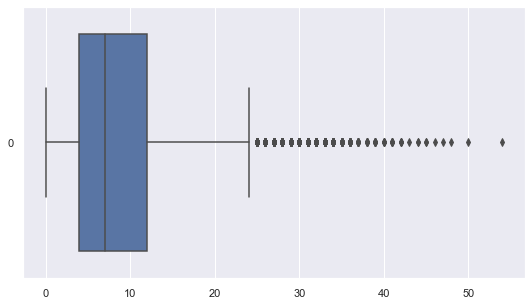

Крайнее возможное значение "правого уса" по столбцу kills: 24.000
Крайнее возможное значение "левого уса" по столбцу kills: -8.000
Количество выбросов, превышающих размах "правого уса" по столбцу kills: 1069
Количество выбросов, превышающих размах "левого уса" по столбцу kills: 0
Доля выбросов от общего числа значений по столбцу kills: 2.07%


In [35]:
bplot(df, 'kills')

In [36]:
real_ratio(df, 'kills')

Процентное соотношение выбросов от всего датафрейма: 22.97%


In [37]:
outburst_info(df, 'kills')

Пороговое значение: 35
Количество матчей: 71
Доля значений от общего числа записей в датафрейме: 1.37%


In [38]:
df = cleaning(df, 'kills')
conclusion()

Количество значений в датафрейме после обработки: 50960


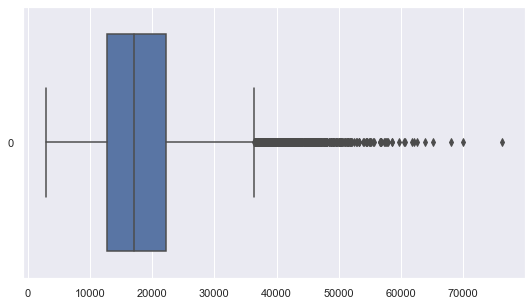

Крайнее возможное значение "правого уса" по столбцу total_gold: 36443.250
Крайнее возможное значение "левого уса" по столбцу total_gold: -1366.750
Количество выбросов, превышающих размах "правого уса" по столбцу total_gold: 961
Количество выбросов, превышающих размах "левого уса" по столбцу total_gold: 0
Доля выбросов от общего числа значений по столбцу total_gold: 1.89%


In [39]:
bplot(df, 'total_gold')

In [40]:
real_ratio(df, 'total_gold')

Процентное соотношение выбросов от всего датафрейма: 10.50%


In [41]:
outburst_info(df, 'total_gold')

Пороговое значение: 51258
Количество матчей: 37
Доля значений от общего числа записей в датафрейме: 0.73%


In [42]:
df = cleaning(df, 'total_gold')
conclusion()

Количество значений в датафрейме после обработки: 50590


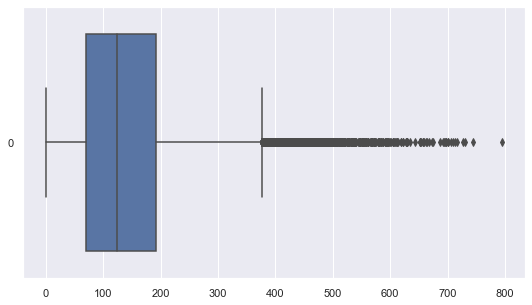

Крайнее возможное значение "правого уса" по столбцу last_hits: 376.000
Крайнее возможное значение "левого уса" по столбцу last_hits: -112.000
Количество выбросов, превышающих размах "правого уса" по столбцу last_hits: 1257
Количество выбросов, превышающих размах "левого уса" по столбцу last_hits: 0
Доля выбросов от общего числа значений по столбцу last_hits: 2.48%


In [43]:
bplot(df, 'last_hits')

In [44]:
real_ratio(df, 'last_hits')

Процентное соотношение выбросов от всего датафрейма: 16.80%


In [45]:
outburst_info(df, 'last_hits')

Пороговое значение: 597
Количество матчей: 48
Доля значений от общего числа записей в датафрейме: 0.95%


In [46]:
df = cleaning(df, 'last_hits')
conclusion()

Количество значений в датафрейме после обработки: 50110


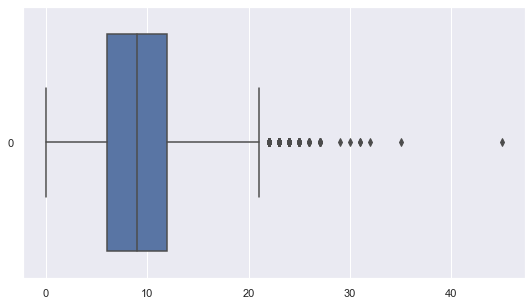

Крайнее возможное значение "правого уса" по столбцу deaths: 21.000
Крайнее возможное значение "левого уса" по столбцу deaths: -3.000
Количество выбросов, превышающих размах "правого уса" по столбцу deaths: 174
Количество выбросов, превышающих размах "левого уса" по столбцу deaths: 0
Доля выбросов от общего числа значений по столбцу deaths: 0.35%


In [47]:
bplot(df, 'deaths')

In [48]:
real_ratio(df, 'deaths')

Процентное соотношение выбросов от всего датафрейма: 4.87%


In [49]:
outburst_info(df, 'deaths')

Пороговое значение: 23
Количество матчей: 69
Доля значений от общего числа записей в датафрейме: 1.38%


In [50]:
df = cleaning(df, 'deaths')
conclusion()

Количество значений в датафрейме после обработки: 49420


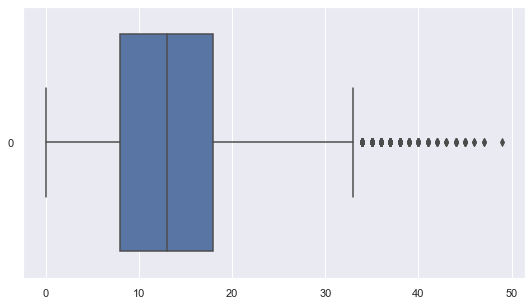

Крайнее возможное значение "правого уса" по столбцу assists: 33.000
Крайнее возможное значение "левого уса" по столбцу assists: -7.000
Количество выбросов, превышающих размах "правого уса" по столбцу assists: 388
Количество выбросов, превышающих размах "левого уса" по столбцу assists: 0
Доля выбросов от общего числа значений по столбцу assists: 0.79%


In [51]:
bplot(df, 'assists')

In [52]:
real_ratio(df, 'assists')

Процентное соотношение выбросов от всего датафрейма: 8.07%


In [53]:
outburst_info(df, 'assists')

Пороговое значение: 39
Количество матчей: 51
Доля значений от общего числа записей в датафрейме: 1.03%


In [54]:
df = cleaning(df, 'assists')
conclusion()

Количество значений в датафрейме после обработки: 48910


In [55]:
print('Было удалено {:.2%} значений из датафрейма'.format(1 - processing() / before_clean))

Было удалено 9.58% значений из датафрейма


In [56]:
for i in null_cols:
    int_cols.append(i)

In [57]:
df[int_cols].describe().astype(int)

,duration,level,kills,deaths,assists,denies,last_hits,total_gold,gpm,xpm,hero_damage,hero_healing,tower_damage,gold,gold_spent
count,48910,48910,48910,48910,48910,48910,48910,48910,48910,48910,48910,48910,48910,48910,48910
mean,42,21,8,8,13,5,140,17680,414,527,21558,580,1963,1755,14661
std,9,4,5,4,6,6,92,6924,121,149,13056,1697,2681,1605,6030
min,17,8,0,0,0,0,0,2890,116,65,0,0,0,0,0
25%,35,18,4,6,8,1,70,12642,327,423,12107,0,176,573,10295
50%,42,22,7,9,13,3,123,16883,402,528,18625,0,874,1272,13975
75%,48,25,12,12,18,8,190,21788,488,632,27955,160,2707,2502,18245
max,80,30,35,23,39,75,597,50801,1278,1773,101415,28586,23245,13127,61940


После обработки максимальные значения наших данных теперь выглядят таким образом. Хоть их и не получилось обрезать "под корень", зато получилось немного снизить вариативность и стандартное отклонение у части столбцов, а значит и снизить погрешность при исследовании.

При очистке низких значений столбца level, заодно были очищены пропуски в столбце total_xp, убедимся в этом:

In [58]:
find_null()

Количество пропусков в датафрейме:
player         2743
party_size    20340
party_id      18210
dtype: int64


Приведем этот столбец к целочисленному типу:

In [59]:
df['total_xp'] = df['total_xp'].astype(int)

In [60]:
df.dtypes

match                    int64
patch                    int64
date            datetime64[ns]
duration                 int64
player                 float64
party_size             float64
party_id               float64
team                    object
hero                     int64
level                    int64
kills                    int64
deaths                   int64
assists                  int64
denies                   int64
last_hits                int64
hero_damage              int64
hero_healing             int64
tower_damage             int64
gold                     int64
gold_spent               int64
total_gold               int64
total_xp                 int64
gpm                      int64
xpm                      int64
kpm                    float64
lhpm                   float64
hdpm                   float64
hhpm                   float64
win_status               int64
year                     int64
dtype: object

### Вывод

На этом этапе очистили столбцы hero_damage, hero_healing, tower_damage, gold, gold_spent и total_xp от пропусков, а также  привели их целочисленному типу. Столбец date привели к типу datetime и создали столбец year, в котором содержится год игры. Подчистили аномальные значения в столбцах level, hero_damage, kills, deaths, total_gold, assists, last_hits. 

### Этап 3. Исследовательский анализ данных

На этом этапе:
- изучим взаиомосвязь игровых статистик с победой для игрока и команды
- изучим распределение значений по разным столбцам для победивших и проигравших
- построим сводные таблицы по суммарным и средним значениям после матча
- изучим разницу между взаимосвязями по типам команд и датами матчей
- рассчитаем, насколько в среднем по характеристикам успешнее команда победителей
- изучим динамику изменения средних значений в зависимости от даты матча

#### 1. Какие характеристики имеют наибольшую взаимосвязь с победой для игрока? 
Для этого рассчитаем значения корреляции и выберем значения не ниже 0.2 и не выше -0.2, чтобы не перегружать таблицу:

In [61]:
def corr_by_type(df, filt):
    filt = pd.DataFrame(data=filt)
    for i in filt['win_status'].unique():
        if -0.2 < i < 0.2:
            filt = filt[~(filt['win_status'] == i)]
    filt = filt.dropna()
    filt = filt.drop('win_status')
    filt = filt.reset_index()
    filt = filt.rename(columns={'index' : 'column_list'})
    filt = filt.rename(columns={'win_status' : 'correlation'})
    return filt

In [62]:
filt = df.corr().round(3).sort_values(by='win_status')['win_status']
corr_by_type(df, filt)

,column_list,correlation
0,deaths,-0.389
1,total_xp,0.234
2,level,0.259
3,kills,0.272
4,kpm,0.305
5,total_gold,0.316
6,gold_spent,0.328
7,assists,0.346
8,xpm,0.359
9,gold,0.446


Таким образом, можно отметить, что больше всего взаимосвязаны с победой столбцы gpm, gold и tower_damage, интересно то, что общее золото за игру с победой взаимосвязано на порядок меньше, чем золото в минуту. Также можно отметить, что количество смертей имеет обратную взаимосвязь с победой, что и не удивительно.

Имея на руках столбцы с наиболее выраженной взаимосвязью с победой построим таблицу матрицы корреляций, в которой можно будет увидеть, как эти столбцы коррелируют между собой. Также добавим такие интересные характеристики, как hero_damage и last_hits, которые не попали в таблицу выше: 

In [63]:
correlation_cols = list(corr_by_type(df, filt)['column_list'])
correlation_cols.append('hero_damage')
correlation_cols.append('last_hits')
correlation_cols.append('win_status')

In [64]:
dcorr = df[correlation_cols].corr().round(2)
dcorr = (
    dcorr.rename(columns={'tower_damage': 'tower_dmg', 'hero_damage' : 'hero_dmg'}, 
                 index={'tower_damage': 'tower_dmg', 'hero_damage' : 'hero_dmg'})
)
dcorr.style.background_gradient(cmap='coolwarm')

,deaths,total_xp,level,kills,kpm,total_gold,gold_spent,assists,xpm,gold,tower_dmg,gpm,hero_dmg,last_hits,win_status
deaths,1,0.04,0.02,-0.13,-0.28,-0.02,-0.11,0.08,-0.29,-0.23,-0.29,-0.37,0.06,-0.1,-0.39
total_xp,0.04,1,0.92,0.64,0.41,0.89,0.85,0.41,0.81,0.37,0.36,0.63,0.73,0.68,0.23
level,0.02,0.92,1,0.56,0.39,0.79,0.76,0.42,0.8,0.34,0.34,0.6,0.64,0.6,0.26
kills,-0.13,0.64,0.56,1,0.92,0.66,0.63,0.18,0.67,0.35,0.39,0.68,0.73,0.38,0.27
kpm,-0.28,0.41,0.39,0.92,1,0.44,0.44,0.06,0.65,0.31,0.39,0.68,0.56,0.23,0.31
total_gold,-0.02,0.89,0.79,0.66,0.44,1,0.95,0.32,0.68,0.45,0.5,0.79,0.72,0.82,0.32
gold_spent,-0.11,0.85,0.76,0.63,0.44,0.95,1,0.29,0.69,0.28,0.49,0.79,0.67,0.8,0.33
assists,0.08,0.41,0.42,0.18,0.06,0.32,0.29,1,0.25,0.23,0.08,0.13,0.32,0.04,0.35
xpm,-0.29,0.81,0.8,0.67,0.65,0.68,0.69,0.25,1,0.39,0.47,0.81,0.6,0.56,0.36
gold,-0.23,0.37,0.34,0.35,0.31,0.45,0.28,0.23,0.39,1,0.4,0.48,0.31,0.32,0.45


В таблице можно заметить как очевидные закономерности, так и не очень явные, например: получаемое золото в минуту сильно связано с получаемым опытом в минуту, потраченное золото на момент окончания матча сильно связано с суммарным опытом и количеством убийств, урон по героям связан с потраченным золотом. Чтобы посмотреть, как распределяются значения. Выборочно построим диаграммы рассеяния и выведем корреляцию по столбцам 'last_hits' и 'gold_spent', 'hero_damage' и 'xpm' учитывая победивших и проигравших игроков:

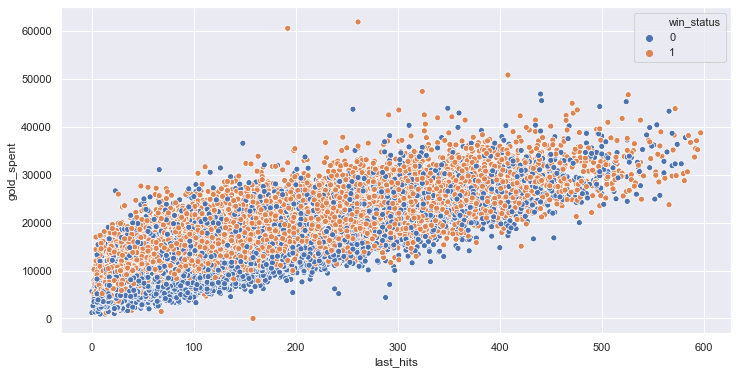

      Коэффициент корреляции между last_hits и gold_spent: 0.799


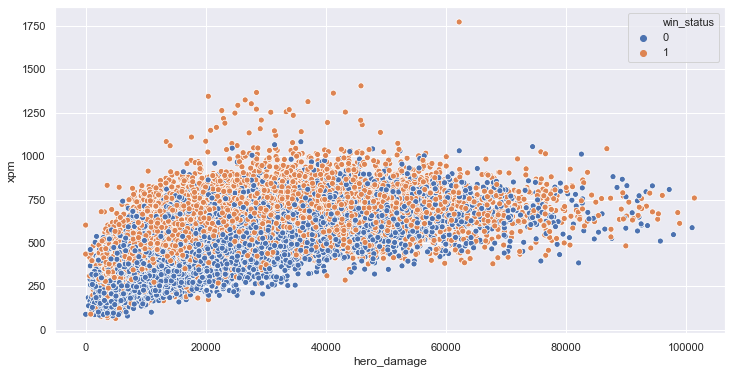

      Коэффициент корреляции между hero_damage и xpm: 0.598


In [65]:
def scatter(df, x, y):
    plt.subplots(figsize=(12, 6))
    sns.scatterplot(data=df, x=x, y=y, hue='win_status') 
    plt.show()
    pearson = (df[x].corr(df[y])).round(3)
    print(f'      Коэффициент корреляции между {x} и {y}: {pearson}')
scatter(df, 'last_hits', 'gold_spent')
scatter(df, 'hero_damage', 'xpm')

- На первом графике взаимосвязь между last_hits и gold_spent. Это может говорить о том, что победители чаще тратят больше золота, также полученные значения можно интепретировать как, чем больше last_hits, тем больше тратится золота, либо чем больше тратится золота, тем больше last_hits.
- 2й график: взаимосвязь урона по героям и получаемого опыта в минуту. При этом, похоже, что взаимосвязь не совсем линейная, на графике видно, что в интервале 60 до 80k hero_damage xpm снижается. Это может быть связано с длительностью игры, когда на последних этапах накопление опыта идет медленнее, либо опыт перестал(?) накапливаться по достижению максимального уровня.

In [66]:
#Медленный код, который выведет все корреляции в заданном интервале значений:
#c = 0
#for i in df.columns:
#    if i == 'date' or i =='team' or i =='match' or i=='patch':
#        continue
#    for j in df.columns: 
#        if j == 'date' or j =='team' or j =='match' or j =='patch':
#            continue  
#        if df.corr()[i][j] > 0.59 and df.corr()[i][j] < 1:
#            c += 1
#            print('{}. {} and {}: {:.3f}'.format(c, i, j, df.corr()[i][j]))

#### 2. Посмотрим, как на гистограммах распределяются значения для победивших и проигравших игроков.
Гистограммы будем строить по части столбцов из таблицы матрицы корелляций:

In [67]:
def distribution(column):
    plt.subplots(figsize=(10,5))
    df[df['win_status']==1][column].hist(bins=20, alpha=0.7, label='won')
    df[df['win_status']==0][column].hist(bins=20, alpha=0.4, label='lose', color='g')
    plt.xlabel(column)
    plt.legend(['won', 'lose'])
    plt.show()

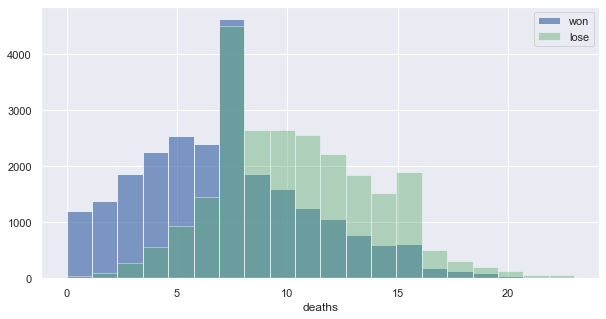

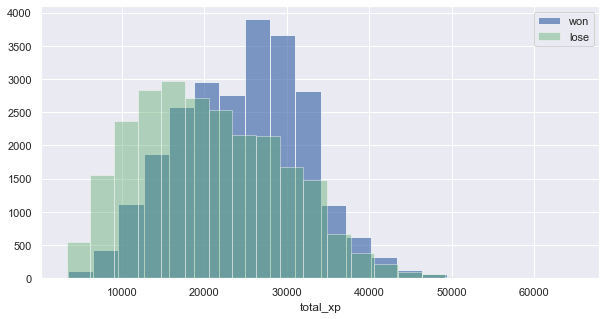

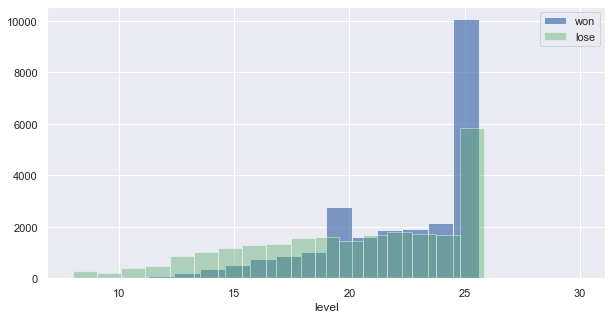

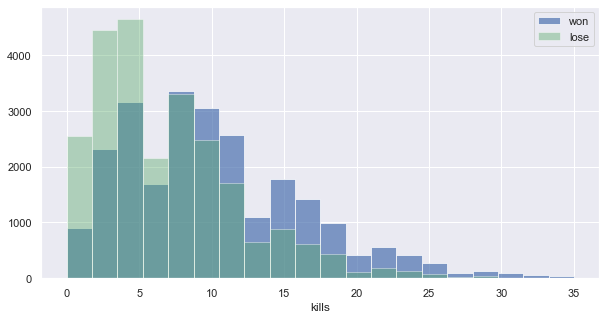

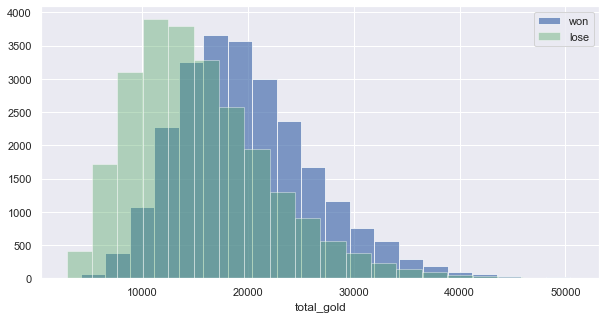

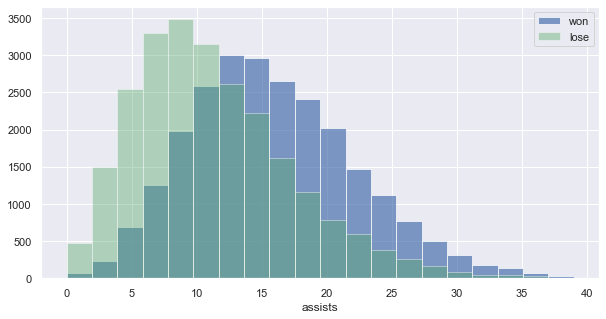

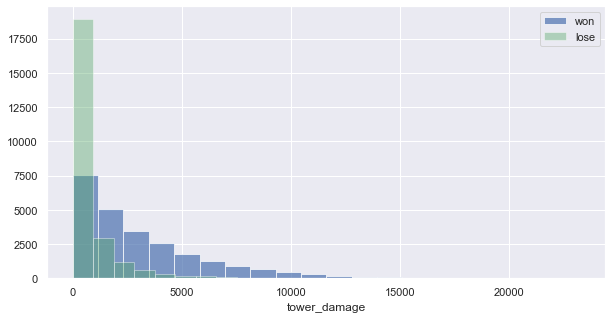

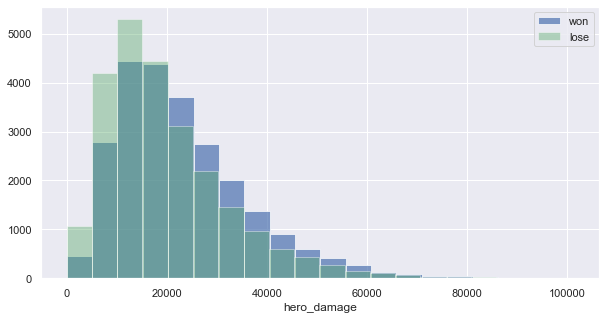

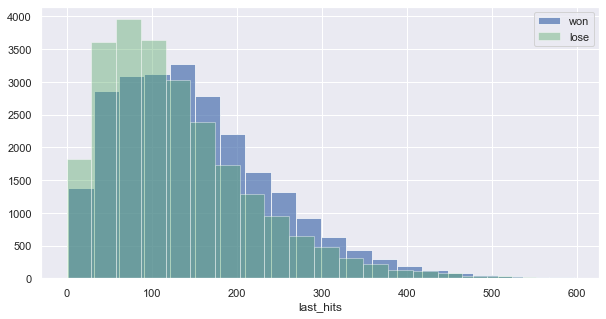

In [68]:
for i in correlation_cols:
    if i == 'win_status' or i =='gold' or i == 'gold_spent'  or i == 'kpm' or i=='xpm' or i=='gpm':
        continue
    distribution(i)

Как видно по графикам, распределение значений проигрывающих игроков смещено влево относительно побеждающих, при этом проигрывающие чаще имеют больше смертей на момент окончания матча и реже достигают 25 уровня, чем победители.

#### 3. Построим сводную таблицу с сумарными значениями по каждому матчу между победившей и проигравшей командой:

In [69]:
cols_order = (
    ['kills', 'deaths', 'assists', 'level',  'denies', 
     'last_hits', 'tower_damage', 'total_gold', 'gold', 'gold_spent', 'gpm', 'total_xp', 
    'xpm', 'kpm','lhpm','hdpm', 'hhpm', 'hero_damage', 'hero_healing', 'party_size']
)

In [70]:
match_pivot = (
df.pivot_table(index=['year', 'match', 'duration', 'win_status'], 
               values = cols_order, aggfunc='sum')
)
match_pivot = match_pivot[cols_order].round(1)
cols_order.remove('party_size')
match_pivot.head(10)

kills  deaths  assists  level  denies  \
year match      duration win_status                                          
2016 2186463311 20       0               5      24       17     49      10   
                         1              24       7       34     61      28   
     2317384568 46       0              52      30       65    107      20   
                         1              28      53       50    104      18   
     2317519290 44       0              45      49       95     99      14   
                         1              49      47      104    106      28   
     2317715122 44       0              29      60       37     94      20   
                         1              60      29       86    107      23   
     2317811491 33       0              16      40       28     66      32   
                         1              40      18       58     87      31   

                                     last_hits  tower_damage  total_gold  \
year match      duration win_status                                        
2016 2186463311 20       0                 184           369       36061   
                         1                 362          9277       53268   
     2317384568 46       0                 796          3216       91635   
                         1                 759         14352      106650   
     2317519290 44       0                 534          1534       77994   
                         1                 766         11837      107848   
     2317715122 44       0                 623           928       76472   
                         1                 639         13139      111182   
     2317811491 33       0                 346          1509       47839   
                         1                 547          9223       79865   

                                      gold  gold_spent   gpm  total_xp   xpm  \
year match      duration win_status                                            
2016 2186463311 20       0            8844       18040  1775     29091  1432   
                         1            8238       48135  2622     43049  2119   
     2317384568 46       0            3512       83695  2014    124668  2740   
                         1           16229       80050  2344    119209  2620   
     2317519290 44       0            5965       63975  1774    107145  2437   
                         1           17841       79965  2453    125479  2854   
     2317715122 44       0            7313       53730  1756     95241  2187   
                         1           15000       91890  2553    125988  2893   
     2317811491 33       0            2430       40890  1449     50976  1544   
                         1            7422       76750  2419     86567  2622   

                                     kpm  lhpm    hdpm   hhpm  hero_damage  \
year match      duration win_status                                          
2016 2186463311 20       0           0.2   9.1   733.0   30.7        14892   
                         1           1.2  17.8  1579.3   36.1        32086   
     2317384568 46       0           1.1  17.5  1537.8   27.4        69969   
                         1           0.6  16.7  1282.7   88.3        58365   
     2317519290 44       0           1.0  12.1  1503.6  147.2        66108   
                         1           1.1  17.4  1913.4  183.5        84124   
     2317715122 44       0           0.7  14.3  1222.8    0.0        53253   
                         1           1.4  14.7  1850.7   31.3        80600   
     2317811491 33       0           0.5  10.5  1125.2    3.5        37152   
                         1           1.2  16.6  1749.2   77.2        57753   

                                     hero_healing  party_size  
year match      duration win_status                            
2016 2186463311 20       0                    624         0.0  
                         1                    733         0.0  
     2317384568 46       0       

Возвращаемся к нерешенной проблеме с party_size. Кроме того, что пока нельзя дифференцировать игры по наличию союзников, все значения NaN датафрейма приняли нулевые значения в сводной таблице. Проверим это:

In [71]:
match_pivot['party_size'].isna().sum()

0

Пропусков нет, но в этот раз мы создадим их сами: по суммарным значениям в столбце party_size выделим категории 'singleplayer' и 'multiplayer', нулевые значения превратим в NaN.

In [72]:
%%time
def fix_party(row):
    if row == 5:
        return 'singleplayer'
    elif row > 5:
        return 'multiplayer'
    else:
        return None

match_pivot['party_status'] = match_pivot['party_size'].apply(fix_party)  

CPU times: user 2.99 ms, sys: 189 µs, total: 3.17 ms
Wall time: 3.09 ms


Посчитаем пропуски и матчи:

In [73]:
print('Количество пропусков в party_status:', int(match_pivot['party_status'].isna().sum() / 2))
print()
print((match_pivot['party_status'].value_counts() / 2).astype(int))

Количество пропусков в party_status: 2034

multiplayer     1514
singleplayer    1343
Name: party_status, dtype: int64


Идентифицируем и удалим чит-матчи, в которых играют singlepayer против команд с союзниками:

In [74]:
match_pivot = match_pivot.reset_index()

In [75]:
%%time
match_list = match_pivot['match'].unique()
cheat_party = [i for i in match_list if len(match_pivot[match_pivot['match'] == i]['party_status'].unique()) > 1]

CPU times: user 4.51 s, sys: 54.9 ms, total: 4.56 s
Wall time: 5.16 s


In [76]:
print(f'Удалено матчей: {len(cheat_party)}')
match_pivot = match_pivot[~match_pivot['match'].isin(cheat_party)]

Удалено матчей: 72


Теперь сводная таблица полностью готова к работе. 
#### 4. Визуализируем матчи по новому столбцу party_status после обработки:

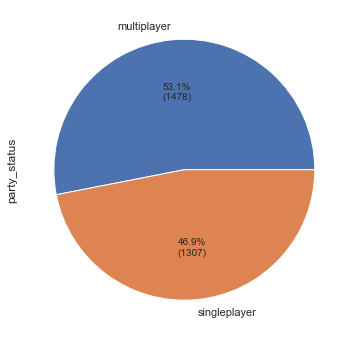

In [77]:
def piechart(df, column, size):
    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}%\n({:d})".format(pct, absolute)

    plt.subplots(figsize=(size,size))
    data = (df[column].value_counts() / 2).astype(int)
    data.plot(kind='pie', autopct=lambda pct: func(pct, data))#'%1.2f%%')
    plt.show()
    
piechart(match_pivot, 'party_status', 6)

Количество singleplayer и multiplayer матчей почти одинаковое. 
#### 5. Исследуем, как отличаются взаимосвязи между основными характеристиками и победой по разному party_status.
Выведем характеристики, которые сильнее взаимосвязаны с победой:

In [78]:
filtsingle = (match_pivot[match_pivot['party_status'] == 'singleplayer']
              .corr().round(3).sort_values(by='win_status')['win_status']
             )
filtmulti = (match_pivot[match_pivot['party_status'] == 'multiplayer']
             .corr().round(3).sort_values(by='win_status')['win_status']
            )
corr_by_type(match_pivot, filtsingle)
corr_by_type(match_pivot, filtmulti)

corr_by_party = (
    corr_by_type(match_pivot, filtsingle).merge
    (corr_by_type(match_pivot, filtmulti), how='left', on='column_list')
)
corr_by_party.columns = ['column_list', 'singleplayer', 'multiplayer']
corr_by_party.loc[corr_by_party['multiplayer'].isna() & (corr_by_party['column_list'] == 'hero_damage'), 'multiplayer'] = (
    match_pivot[match_pivot['party_status'] == 'multiplayer'].corr().round(3)['win_status']['hero_damage']
)
corr_by_party


,column_list,singleplayer,multiplayer
0,deaths,-0.526,-0.534
1,hero_damage,0.204,0.199
2,last_hits,0.228,0.204
3,total_xp,0.277,0.268
4,level,0.327,0.305
5,total_gold,0.375,0.370
6,hdpm,0.387,0.379
7,lhpm,0.410,0.358
8,gold_spent,0.412,0.409
9,assists,0.424,0.456


Коэффициенты корреляций похожи для обоих типов команд: очень сильная корреляция с победой у tower_damage и gpm, также высокие показатели для остатка золота в конце матча. Интересно, что корреляция по столбцу assists немного выше для multiplayer. Общее количество смертей имеет значимую обратную связь с победой. Посмотрим, как данные распределены на графике:

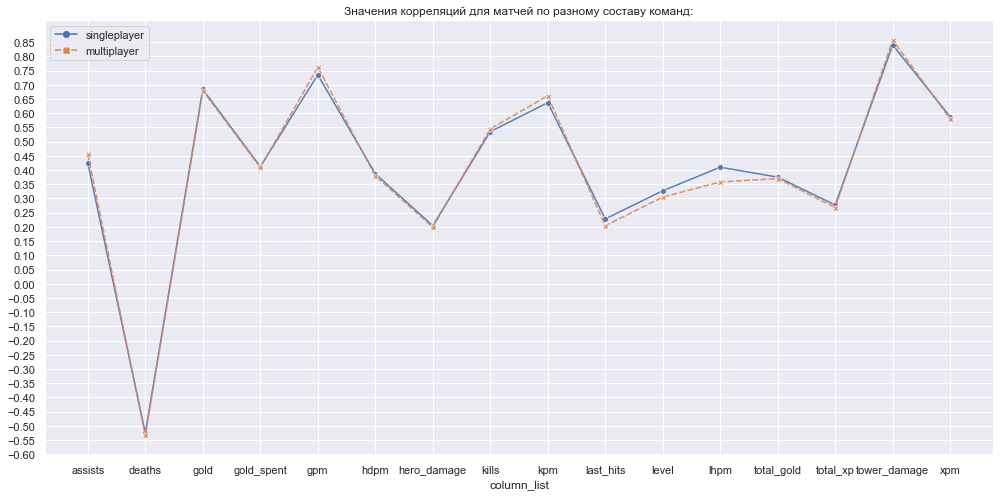

In [79]:
plt.subplots(figsize=(17, 8))
sns.lineplot(data=corr_by_party.set_index('column_list'), alpha=0.9, markers=True)
plt.yticks(np.arange(-0.6, 0.9, step=0.05))
plt.title('Значения корреляций для матчей по разному составу команд:')
plt.show()

На графике видно, что значения для обоих типов party_status практически совпадают и отличаются незначительно. Наибольшие различия имеют столбцы last_hits, level и lhpm - корреляция с победой у них выше для singleplayer.

#### 6. Посмотрим, как распределилось количество матчей по годам в датасете:

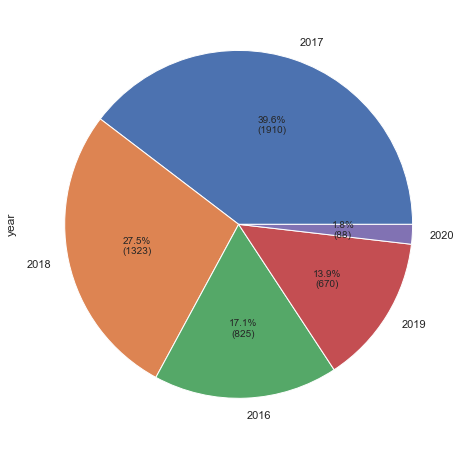

In [80]:
piechart(match_pivot, 'year', 8)

Больше всего данных собрано за 2017й год, меньше всего за 2020й - только 1.8%. В целом данных за 2020й год достаточно для анализа, при этом из-за их небольшого количества может быть некоторый разброс в точности полученных значений. То есть, при большем объеме наблюдений в выборке за 2020 год, мы потенциально могли бы получить некоторые небольшие различия в получаемых результатах при исследовании.

#### 7. Рассчитаем значения корреляции по каждому году.
Выберем только те значения, которые больше всего влияют на победу:

In [81]:
def choose(df, column, value):
    return df[df[column] == value].corr().round(3).sort_values(by='win_status')['win_status']

corr_by_year = (
    corr_by_type(match_pivot, choose(match_pivot, 'year', 2016)).merge
    (corr_by_type(match_pivot, choose(match_pivot, 'year', 2017)), how='inner', on='column_list').merge
    (corr_by_type(match_pivot, choose(match_pivot, 'year', 2018)), how='inner', on='column_list').merge
    (corr_by_type(match_pivot, choose(match_pivot, 'year', 2019)), how='inner', on='column_list').merge
    (corr_by_type(match_pivot, choose(match_pivot, 'year', 2020)), how='inner', on='column_list')
)
corr_by_year.columns = ['column_list', 2016, 2017, 2018, 2019, 2020]

In [82]:
corr_by_year

,column_list,2016,2017,2018,2019,2020
0,deaths,-0.570,-0.537,-0.546,-0.500,-0.651
1,total_xp,0.340,0.292,0.279,0.243,0.331
2,level,0.347,0.337,0.328,0.283,0.357
3,hdpm,0.373,0.393,0.397,0.341,0.476
4,lhpm,0.435,0.374,0.402,0.352,0.387
5,total_gold,0.451,0.431,0.379,0.310,0.412
6,assists,0.485,0.428,0.454,0.409,0.607
7,gold_spent,0.498,0.469,0.427,0.329,0.442
8,kills,0.578,0.543,0.554,0.510,0.657
9,xpm,0.657,0.592,0.598,0.532,0.651


Из всех столбцов больше всего взаимосвязаны с победой tower_damage, gpm, gold. Также большое влияние имеют kpm, kills, xpm и gold_spent. Интересно то, что за 2020й год корреляция assists с победой намного выше, чем за предыдущие годы. В целом с небольшими различиями, но почти на одном уровне количество смертей обратно связано с победой. Визуализируем распределение корреляций по годам:

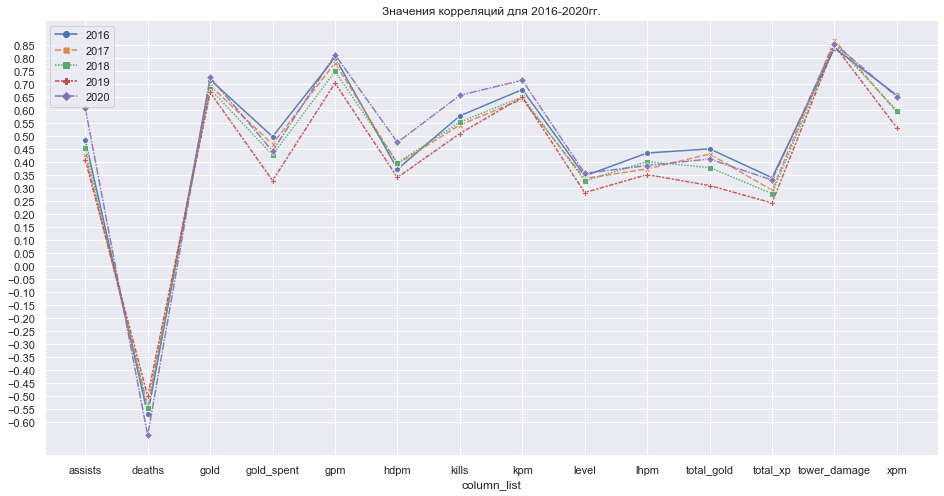

In [83]:
plt.subplots(figsize=(16, 8))
sns.lineplot(data=corr_by_year.set_index('column_list'), alpha=0.9, markers=True)
plt.yticks(np.arange(-0.6, 0.9, step=0.05))
plt.title('Значения корреляций для 2016-2020гг.')
plt.show()

На графике значения по датам шире отстают друг от друга, чем на графике по типу команд. В целом, такие изменения взаимосвязей могут свидетельствовать об изменении механики геймплея. Видно, что больше всего отстоят друг от друга значения за 2016 год и за 2019й, при этом значениям за 2019 год чаще принадлежат минимумы таблицы.

#### 8. Построим общую матрицу корреляций по всем характеристикам из двух таблиц, которые оказывают наибольшее влияние на победу:

In [84]:
correlation_cols = (
    list(set(corr_by_party['column_list'].unique())
         .union(set(corr_by_year['column_list'].unique())))
)
correlation_cols.append('win_status')

In [85]:
mcorr = match_pivot[correlation_cols].corr().round(2)
mcorr = (
    mcorr.rename(columns={'tower_damage': 'tower_dmg', 'hero_damage' : 'hero_dmg'}, 
                 index={'tower_damage': 'tower_dmg', 'hero_damage' : 'hero_dmg'})
)

mcorr.style.background_gradient(cmap='coolwarm')

,last_hits,assists,gpm,kills,total_xp,hero_dmg,deaths,hdpm,gold,kpm,total_gold,lhpm,xpm,gold_spent,level,tower_dmg,win_status
last_hits,1,0.44,0.52,0.53,0.85,0.72,0.24,0.4,0.39,0.03,0.87,0.8,0.54,0.87,0.76,0.39,0.21
assists,0.44,1,0.56,0.83,0.69,0.67,0.06,0.58,0.48,0.56,0.68,0.22,0.62,0.66,0.67,0.47,0.44
gpm,0.52,0.56,1,0.71,0.55,0.42,-0.35,0.5,0.66,0.71,0.67,0.64,0.8,0.7,0.55,0.81,0.76
kills,0.53,0.83,0.71,1,0.77,0.69,0.03,0.6,0.53,0.75,0.78,0.33,0.75,0.77,0.74,0.57,0.54
total_xp,0.85,0.69,0.55,0.77,1,0.85,0.34,0.54,0.44,0.24,0.93,0.52,0.73,0.91,0.93,0.41,0.28
hero_dmg,0.72,0.67,0.42,0.69,0.85,1,0.37,0.82,0.35,0.22,0.79,0.41,0.57,0.77,0.79,0.36,0.19
deaths,0.24,0.06,-0.35,0.03,0.34,0.37,1,0.03,-0.26,-0.43,0.25,-0.2,-0.15,0.16,0.26,-0.42,-0.53
hdpm,0.4,0.58,0.5,0.6,0.54,0.82,0.03,1,0.33,0.5,0.47,0.39,0.65,0.48,0.57,0.47,0.34
gold,0.39,0.48,0.66,0.53,0.44,0.35,-0.26,0.33,1,0.43,0.54,0.38,0.51,0.46,0.43,0.64,0.69
kpm,0.03,0.56,0.71,0.75,0.24,0.22,-0.43,0.5,0.43,1,0.27,0.2,0.65,0.3,0.29,0.6,0.65


#### 9. Изучим,  средние значения послематчевых статистик для команд победителей и проигравших:

In [86]:
totals =(
    match_pivot.pivot_table(index=['win_status'], 
                   values = cols_order, aggfunc='mean')
)
totals = totals[cols_order]
totals = (totals.rename(columns={'tower_damage': 'tower_dmg', 'hero_damage' : 'hero_dmg', 
                                 'hero_healing' : 'hero_heal'})
         )

In [87]:
totals.round(1).sort_index(ascending=False)

,kills,deaths,assists,level,denies,last_hits,tower_dmg,total_gold,gold,gold_spent,gpm,total_xp,xpm,kpm,lhpm,hdpm,hhpm,hero_dmg,hero_heal
win_status,,,,,,,,,,,,,,,,,,,
1,50.3,35.9,78.6,110.8,30.4,758.2,15962.8,99378.0,12366.6,83201.2,2356.7,123014.8,2904.8,1.2,17.8,2725.8,87.4,115997.8,3557.3
0,34.3,51.8,55.2,100.3,25.8,644.0,3653.6,77446.2,5193.4,63396.8,1787.6,102889.8,2367.6,0.8,14.8,2279.0,51.0,99296.2,2224.1


Визуально средние KDA победителей и проигравших можно отобразить на графике:

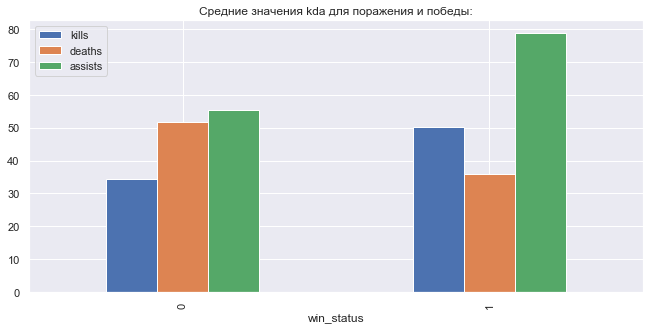

In [88]:
totals_kda = totals[['kills', 'deaths', 'assists']]
totals_kda.plot(kind='bar', figsize=(11,5))
plt.title('Средние значения kda для поражения и победы:')
plt.show()

С этими данными можно сделать выводы еще более наглядными. Рассчитаем соотношение средней эффективности для команды победителей:

In [89]:
totals_share = (totals / (totals.loc[0] + totals.loc[1]))
winners = totals_share.loc[1] - totals_share.loc[0]
data = {'ratio': winners}
winners = pd.DataFrame(data=data)
winners = (winners.rename(index={'tower_damage': 'tower_dmg', 'hero_damage' : 'hero_dmg', 
                                 'hero_healing' : 'hero_heal'})
          )
winners.round(2).T.style.format("{:.0%}")

,kills,deaths,assists,level,denies,last_hits,tower_dmg,total_gold,gold,gold_spent,gpm,total_xp,xpm,kpm,lhpm,hdpm,hhpm,hero_dmg,hero_heal
ratio,19%,-18%,18%,5%,8%,8%,63%,12%,41%,14%,14%,9%,10%,21%,9%,9%,26%,8%,23%


Это означает, что команда победителей в среднем на 19% совершает больше убийств, имеет на 18% меньше смертей и на 18% больше ассистов, наносит на 63% больше урона башням, чем проигравшие и так далее.

#### 10. Изучим, как меняются средние значения некоторых статистик по годам:

In [90]:
year_pivot = (
    df.pivot_table(index=['year', 'win_status'],
                   values = cols_order, aggfunc='mean')
)
year_pivot = year_pivot[cols_order].round(1)

In [91]:
year_pivot = year_pivot.reset_index()

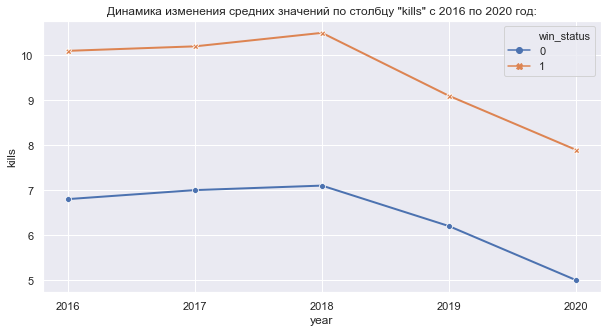

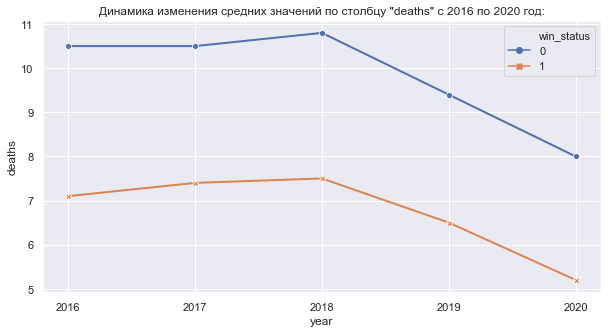

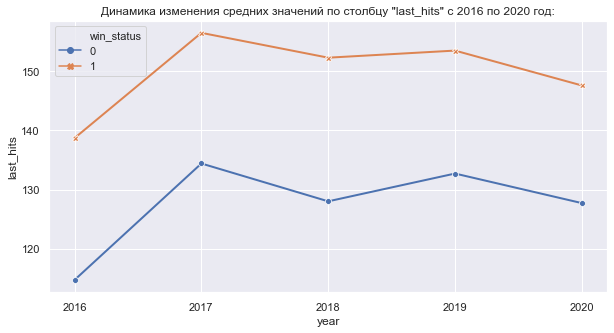

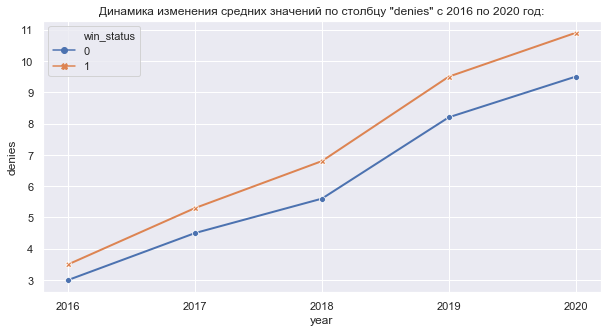

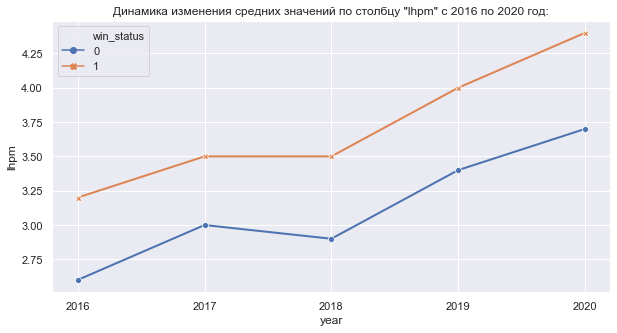

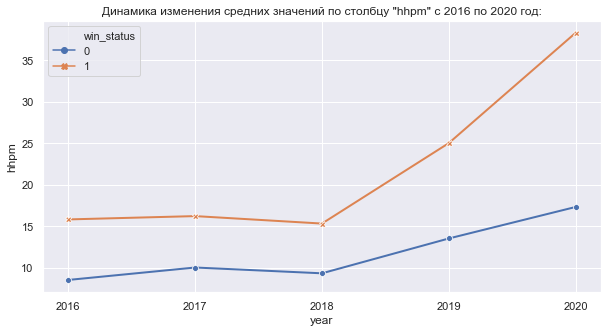

In [92]:
for i in ['kills', 'deaths', 'last_hits', 'denies', 'lhpm', 'hhpm']:
    plt.subplots(figsize=(10, 5))
    (sns.lineplot(data=year_pivot, y=i, x='year', hue='win_status', style='win_status', 
                  linewidth=2, markers=True, dashes=False)
    )
    plt.title(f'Динамика изменения средних значений по столбцу "{i}" c 2016 по 2020 год:')
    plt.xticks(np.arange(2016, 2021, step=1))
    plt.show()

Средние значения убийств и смертей снижаются с 2016 к 2020му году, среднее количество last_hits становится незначительно выше, тогда как lhpm, hhpm и denies растут вверх. 

### Вывод

Таким образом на этом этапе была выявлена взаимосвязь между основными характеристиками влияющими на победу, для игрока - это tower_damage, gpm, gold, deaths, для команды можно добавить kills, kpm, gold_spent, assists. Были выявлены различия в процентном соотношении для выигрывающих команд: победители в среднем на 19% совершает больше убийств, 18% меньше умирают, на 63% наносят больше урона башням, на 12% больше имеют золота и так далее. Также исследовали динамику изменений с 2016 по 2020й год для столбцов 'kills', 'deaths', 'last_hits', 'denies', 'lhpm', 'hhpm': cредние значения убийств и смертей снижаются к 2020му году, а lhpm, hhpm и denies, наоборот, растут вверх.

### Этап 4. Проверка гипотез

- Средние значения assists для singleplayer и multiplayer отличаются;
- Средние значения denies для singleplayer и multiplayer отличаются;

Для начала проверим распределения на нормальность:

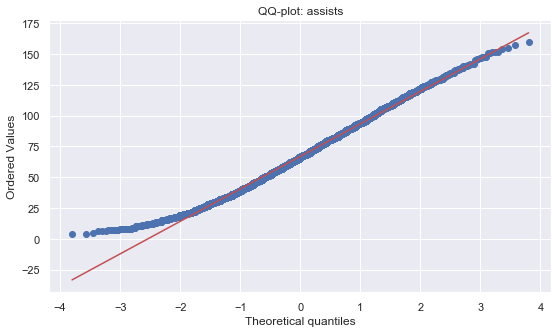

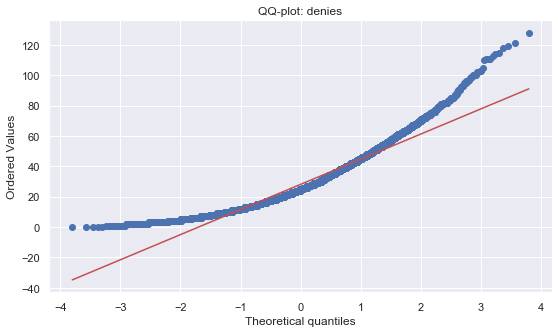

In [93]:
for i in ['assists', 'denies']:
    plt.subplots(figsize=(9,5))
    st.probplot(match_pivot[i], plot=plt)
    plt.title(f'QQ-plot: {i}')
    plt.show()

Для столбца assists данные с большего распределены нормально, поэтому для проверки гипотезы будем использовать t-критерий. Данные столбца denies не имеют формы нормального распределения, присутствуют выбросы, поэтому для проверки гипотезы будем использовать устойчивый к выбросам u-критерий.

##### Сформируем нулевую и альтернативную гипотезы:
- H(0) - в генеральной совокупности никакого различия между выборочными средними нет (M(1) = M(2)), то есть cредние значения assists для singplayer и multiplayer не различаются; различия между выборками denies для singleplayer и multiplayer нет.
- H(1) - средние в генеральной совокупности не равны (M(1) != M(2)), - cредние значения assists для singplayer и multiplayer отличаются; Выборки denies для singleplayer и multiplayer не принадлежат одной генеральной совокупности.

Пороговое значение alpha установим равное 0.01

In [94]:
def variance(array1, array2):
    if round(np.var(array1, ddof=1)) == round(np.var(array2, ddof=1)):
        print('Дисперсии двух выборок равны')
    else:
        print('Дисперсии двух выборок не равны')
        
def t_test(array1, array2, eq):
    alpha = 0.01 
    results = st.ttest_ind(array1, array2, equal_var=eq)
    print('P-value: {}'.format(results.pvalue))
    if (results.pvalue < alpha):
        print(f'P-value < {alpha}, значение генеральной совокупности не попало в доверительный интервал. Отвергаем нулевую гипотезу.')
    else:
        print(f'P-value > {alpha}, значение генеральной совокупности попало в доверительный интервал. Данные согласуются с нулевой гипотезой.') 

def mnwhite(array1, array2):
    alpha = 0.01
    results = st.mannwhitneyu(array1, array2)
    print('P-value: {}'.format(results.pvalue))
    if (results.pvalue < alpha):
        print(f'P-value < {alpha}, выборки не принадлежат одной генеральной совокупности. Отвергаем нулевую гипотезу.')
    else:
        print(f'P-value > {alpha}, выборки принадлежат одной генеральной совокупности. Данные согласуются с нулевой гипотезой.') 

def interval(array1, array2):
    container = []
    x1 = array1.mean()
    x2 = array2.mean()
    std_x1 = np.std((array1), ddof=1)
    std_x2 = np.std((array2), ddof=1)
    n1 = len(array1)
    n2 = len(array2)
    se = np.sqrt((std_x1**2)/n1 + (std_x2**2)/n2)
    container.append(((x1-x2) - 2*se))
    container.append(((x1-x2) + 2*se))
    print('Значения доверительного интервала: {}'.format(list(map(lambda x: x.round(3), container))))
    print('Разница средних: {:.3f}'.format( x1-x2))

#### Проверим гипотезу: cредние значения Assists для singleplayer и multiplayer различаются?

In [95]:
singleplayer_as = match_pivot[match_pivot['party_status'] == 'singleplayer']['assists']
multiplayer_as = match_pivot[match_pivot['party_status'] == 'multiplayer']['assists']
variance(singleplayer_as, multiplayer_as)

Дисперсии двух выборок не равны


In [96]:
t_test(singleplayer_as, multiplayer_as, False)
interval(singleplayer_as, multiplayer_as)

P-value: 0.3102820341553144
P-value > 0.01, значение генеральной совокупности попало в доверительный интервал. Данные согласуются с нулевой гипотезой.
Значения доверительного интервала: [-0.69, 2.111]
Разница средних: 0.711


#### Проверим гипотезу: cредние значения Denies для singleplayer и multiplayer различаются?

In [97]:
singleplayer_de = match_pivot[match_pivot['party_status'] == 'singleplayer']['denies']
multiplayer_de = match_pivot[match_pivot['party_status'] == 'multiplayer']['denies']

In [98]:
mnwhite(singleplayer_de, multiplayer_de)

P-value: 2.395027455122096e-66
P-value < 0.01, выборки не принадлежат одной генеральной совокупности. Отвергаем нулевую гипотезу.


### Вывод

Были проверены гипотезы о том, что cредние значения Assists и Denies отличаются для разных составов команд: для Assists приняли нулевую гипотезу, доверительный интервал пересекает 0; для Denies подтвердилась альтернативная гипотеза о различиях - выборки принадлежат разным генеральным совокупностям.

### Этап 5. Общий вывод

Был проведен предварительный анализ матчей Dota 2: изучен датафрейм, данные были предобработаны, а найденные в них ошибки исправлены, столбцы приведены к нужным типам; были рассчитаны суммарные статистики по каждому матчу, средние значения для проигравших и победителей, выявлены характеристики, которые больше всего влияют на победу для игрока и команды.

##### На основе исследовательского анализа данных были получены следующие выводы:
- Наибольшую взаимосвязь с победой для игрока имеют:
    - gold: 0.446,  tower_damage: 0.459, gpm: 0.466, deaths: -0.389
- Наибольшую взаимосвязь с победой для команды имеют:
    - tower_dmage: 0.84, gpm: 0.76, gold: 0.69, kpm: 0.65, xpm: 0.57, kills: 0.54, assists: 0.44, deaths -0.53
- В среднем побеждающая команда имеет больше:
    - kills: 19%,	deaths: -18%, assists: 18%, tower_dmg: 63%, kpm: 21%, hhpm: 26%
- C 2016 по 2020й есть тенденции к изменению геймплея:
    - cредние значения убийств и смертей снижаются с 2016 к 2020му году, среднее количество last_hist становится незначительно выше, тогда как lhpm, hhpm и denies растут вверх.

##### Были проверены гипотезы:
- Средние значения Assists отличаются для разных составов команд: подтвердилась нулевая гипотеза, различий нет.
- Средние значения Denies отличаются для разных составов команд: подтвердилась альтернативная гипотеза - выборки принадлежат разным генеральным совокупностям.

In [100]:
!git init

Initialized empty Git repository in /Users/carroll/My Own Projects/Dota Analytics/.git/


In [101]:
!git config --local user.name "Kiryl"

In [102]:
!git config --local user.email musomania@protonmail.com

In [103]:
!git status

On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	.ipynb_checkpoints/
	dota_analytics.ipynb

nothing added to commit but untracked files present (use "git add" to track)


In [104]:
!git add dota_analytics.ipynb

In [105]:
!git status

On branch master

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)

	new file:   dota_analytics.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	.ipynb_checkpoints/



In [ ]:
!git commit dota_analytics.ipynb -m"latest changes"